# 筆試題  

請利用以下資料，利用機器學習或深度學習方法，設計開發蘋果(AAPL)股價買進賣出訊號模型  
* 最終結果請提供蘋果(AAPL)，2020年買賣點，欄位必須包含：
    * 日期
    * 進出方式：以buy、sell顯示
    * 價格  
* 模型前提
    * 以做多方式思考
    * 以持有或空手思考，不需考慮成本、張數問題
    * 買賣日以當日符合買進(賣出)條件，至少隔日之後才能做進出動作
    * 資料、資料預處理方法可自行增減或處理
    * 訓練方式長度自行決定(切勿使用到未來資料)
    * 演算法請自行挑選
    * 程式過程必須可產生提供之2020年買賣點資料
* 以上未定義規則可自行決定，但須將前提表列說明

In [1]:
# local imports
from util import delay
from data.gen_data import build_Y
from data.feature_set import feature_set
from experiment.exp import *
from experiment.evaluate import trade_stock
from experiment.evaluate import evaluate

# 開始訓練模型

In [2]:
# 訓練時間為目標年往前7年
# 目標年為2020年
target_year = 2020
train_year = 7
train_start = f'{target_year-train_year}/01/01'
eval_start = f'{target_year}/01/01'

In [3]:
# CatBoostReg_raise_fall為一次實驗，全部的實驗定義在exp.py中
# 每個實驗的回傳值我將之稱為"trader",是繼承至自定義的Class:Trader
# 如此一來不不同的實驗所用的不同的演算法可以個字overwrite data preprocess,以及overwrite predict以達到最外層的介面都ㄧ樣
seed = 0
trader = CatBoostReg_raise_fall(train_start, delay(train_start, {'years':train_year}), 2, 3, feature_set['talib'], seed)

0:	learn: 2.9083191	total: 70.1ms	remaining: 14s
1:	learn: 2.8869902	total: 83.2ms	remaining: 8.24s
2:	learn: 2.8670673	total: 95.6ms	remaining: 6.28s
3:	learn: 2.8464279	total: 109ms	remaining: 5.32s
4:	learn: 2.8334961	total: 122ms	remaining: 4.75s
5:	learn: 2.8108732	total: 134ms	remaining: 4.34s
6:	learn: 2.7953622	total: 146ms	remaining: 4.02s
7:	learn: 2.7916719	total: 158ms	remaining: 3.8s
8:	learn: 2.7745987	total: 171ms	remaining: 3.63s
9:	learn: 2.7631684	total: 184ms	remaining: 3.49s
10:	learn: 2.7460595	total: 196ms	remaining: 3.37s
11:	learn: 2.7430108	total: 208ms	remaining: 3.26s
12:	learn: 2.7279396	total: 220ms	remaining: 3.16s
13:	learn: 2.7158057	total: 232ms	remaining: 3.08s
14:	learn: 2.6975963	total: 244ms	remaining: 3s
15:	learn: 2.6881352	total: 255ms	remaining: 2.93s
16:	learn: 2.6783835	total: 266ms	remaining: 2.87s
17:	learn: 2.6606929	total: 279ms	remaining: 2.82s
18:	learn: 2.6503001	total: 290ms	remaining: 2.76s
19:	learn: 2.6401775	total: 303ms	remaining:

161:	learn: 1.5680621	total: 2.12s	remaining: 498ms
162:	learn: 1.5670507	total: 2.13s	remaining: 485ms
163:	learn: 1.5603125	total: 2.15s	remaining: 472ms
164:	learn: 1.5558149	total: 2.17s	remaining: 459ms
165:	learn: 1.5500146	total: 2.18s	remaining: 446ms
166:	learn: 1.5457015	total: 2.19s	remaining: 434ms
167:	learn: 1.5388244	total: 2.21s	remaining: 421ms
168:	learn: 1.5314080	total: 2.22s	remaining: 408ms
169:	learn: 1.5291017	total: 2.24s	remaining: 395ms
170:	learn: 1.5225313	total: 2.25s	remaining: 382ms
171:	learn: 1.5163773	total: 2.27s	remaining: 369ms
172:	learn: 1.5115678	total: 2.28s	remaining: 356ms
173:	learn: 1.5059138	total: 2.29s	remaining: 342ms
174:	learn: 1.4993719	total: 2.3s	remaining: 329ms
175:	learn: 1.4982150	total: 2.32s	remaining: 316ms
176:	learn: 1.4922709	total: 2.33s	remaining: 303ms
177:	learn: 1.4873154	total: 2.34s	remaining: 290ms
178:	learn: 1.4866557	total: 2.36s	remaining: 277ms
179:	learn: 1.4857953	total: 2.38s	remaining: 264ms
180:	learn: 1

125:	learn: 1.8070086	total: 1.66s	remaining: 973ms
126:	learn: 1.8007207	total: 1.67s	remaining: 959ms
127:	learn: 1.7946135	total: 1.68s	remaining: 946ms
128:	learn: 1.7869023	total: 1.69s	remaining: 932ms
129:	learn: 1.7795164	total: 1.71s	remaining: 919ms
130:	learn: 1.7674682	total: 1.72s	remaining: 905ms
131:	learn: 1.7581822	total: 1.73s	remaining: 892ms
132:	learn: 1.7502102	total: 1.74s	remaining: 878ms
133:	learn: 1.7405599	total: 1.75s	remaining: 865ms
134:	learn: 1.7346128	total: 1.77s	remaining: 852ms
135:	learn: 1.7264602	total: 1.78s	remaining: 840ms
136:	learn: 1.7238281	total: 1.8s	remaining: 826ms
137:	learn: 1.7144655	total: 1.81s	remaining: 814ms
138:	learn: 1.7072351	total: 1.82s	remaining: 801ms
139:	learn: 1.6977209	total: 1.84s	remaining: 788ms
140:	learn: 1.6938345	total: 1.85s	remaining: 776ms
141:	learn: 1.6897626	total: 1.87s	remaining: 764ms
142:	learn: 1.6788701	total: 1.88s	remaining: 751ms
143:	learn: 1.6718718	total: 1.9s	remaining: 738ms
144:	learn: 1.

# 預測2020的進出場點

In [4]:
# 訓練完成之後可以請trader進行predict
# predict的時間如果比訓練的結束時間還早：ex: train data set: 2013/1/1~2019/12/31,如果要預測早於2019/12/31時會有緊告，並中斷程式
# actions為進出場訊號，1:進場作多, -1:進場做空
# actions = [1, -1, -1, 1....]
actions = trader.predict(f'{target_year}/01/01', f'{target_year}/4/3')

# 模擬回測交易
為了確保價格出現的先後順序，在只有日k的情況下，進出場的點位皆為預掛開盤價

# 交易策略定義
進/出場點皆為新/平倉單日開盤價（預掛）
持倉最大單位：1
共有三種交易策略：
1. 新倉t+1天後平倉
2. 新倉t+2天後平倉
3. 新倉t+2天後平倉

In [5]:
# 這邊使用的交易策略為2號交易策略
# result為交易明細
result = trade_stock(f'{target_year}/01/01', f'{target_year}/4/3', actions, strategy_id=2)

In [6]:
# PnL=profit and lose
# 最後兩天沒有結果是因為未來資料還不知道
result

,Date,PnL,daily_return
Date,,,
2020-01-02,2020-01-02,-3.45,-0.011674
2020-01-03,2020-01-03,1.68,0.005667
2020-01-06,2020-01-06,2.37,0.008086
2020-01-07,2020-01-07,6.38,0.021329
2020-01-08,2020-01-08,12.40,0.041827
...,...,...,...
2020-03-30,2020-03-30,3.24,0.012922
2020-03-31,2020-03-31,14.26,0.055790
2020-04-01,2020-04-01,2.70,0.010953


# 產生交易報告
交易報告提供以下幾總指標供參考，目前沒有列出 profit factor
1. MDD
2. Calmer Ratio
3. Sharpe Ratio
3. Profit Factor
4. Win Rate

In [7]:
report = evaluate(result)

In [8]:
report

,Date,MDD,Calmar_Ratio,Sharpe_Ratio,Win_Rate
0,2020/01/02~2020/04/03,-65.03,0.000153,3.494337,0.6


# 圖表化每日報酬變化
2020年截至4月1號的報酬率約為60%

In [9]:
from util import plot_roi
from util import plot_kbar

,ROI
Date,
2020-01-02,-0.011674
2020-01-03,-0.006006
2020-01-06,0.002080
2020-01-07,0.023408
2020-01-08,0.065235
...,...
2020-03-30,0.558903
2020-03-31,0.614693
2020-04-01,0.625647


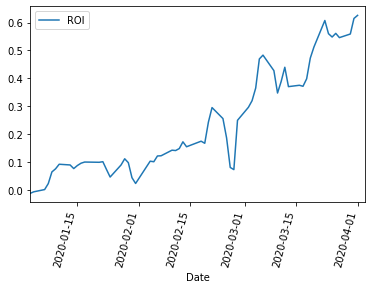

In [10]:
plot_roi(result, plot=True)

# 產生output 檔案
因為預掛開盤價，所以price直接寫當天的開盤價

In [12]:
from data.gen_data import build_X
import pandas as pd
from pickle import dump

In [19]:
apple_price = build_X(start_date='2020/1/1', end_date='2020/4/3', selected_features=['Open'], feature_days=0)

In [20]:
apple_price

,Date,Open_0
0,2020/01/02,295.54
1,2020/01/03,296.45
2,2020/01/06,293.09
3,2020/01/07,299.13
4,2020/01/08,296.46
...,...,...
60,2020/03/30,250.74
61,2020/03/31,255.60
62,2020/04/01,246.50
63,2020/04/02,240.34


In [34]:
output = pd.DataFrame({
    'Date': apple_price.Date,
    'Buy/Sell': ['buy' if 1 == a else 'sell'for a in actions[:-1]],
    'price': apple_price.Open_0,
})

In [35]:
output

,Date,Buy/Sell,price
0,2020/01/02,buy,295.54
1,2020/01/03,buy,296.45
2,2020/01/06,buy,293.09
3,2020/01/07,buy,299.13
4,2020/01/08,buy,296.46
...,...,...,...
60,2020/03/30,sell,250.74
61,2020/03/31,sell,255.60
62,2020/04/01,sell,246.50
63,2020/04/02,buy,240.34


In [37]:
# 存起來
with open('./output_apple_2020.pkl', 'wb') as f:
    dump(output, f)